In [143]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
  
data = pd.read_csv("BankLoanApproval.csv") 

In [144]:
data.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


Exploratory Data Analysis (EDA)

In [145]:
# Data Preprocessing and Visualization
# Get the number of columns of object datatype.

obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [146]:
# Dropping Loan_ID column 
data.drop(['LoanID'],axis=1,inplace=True)

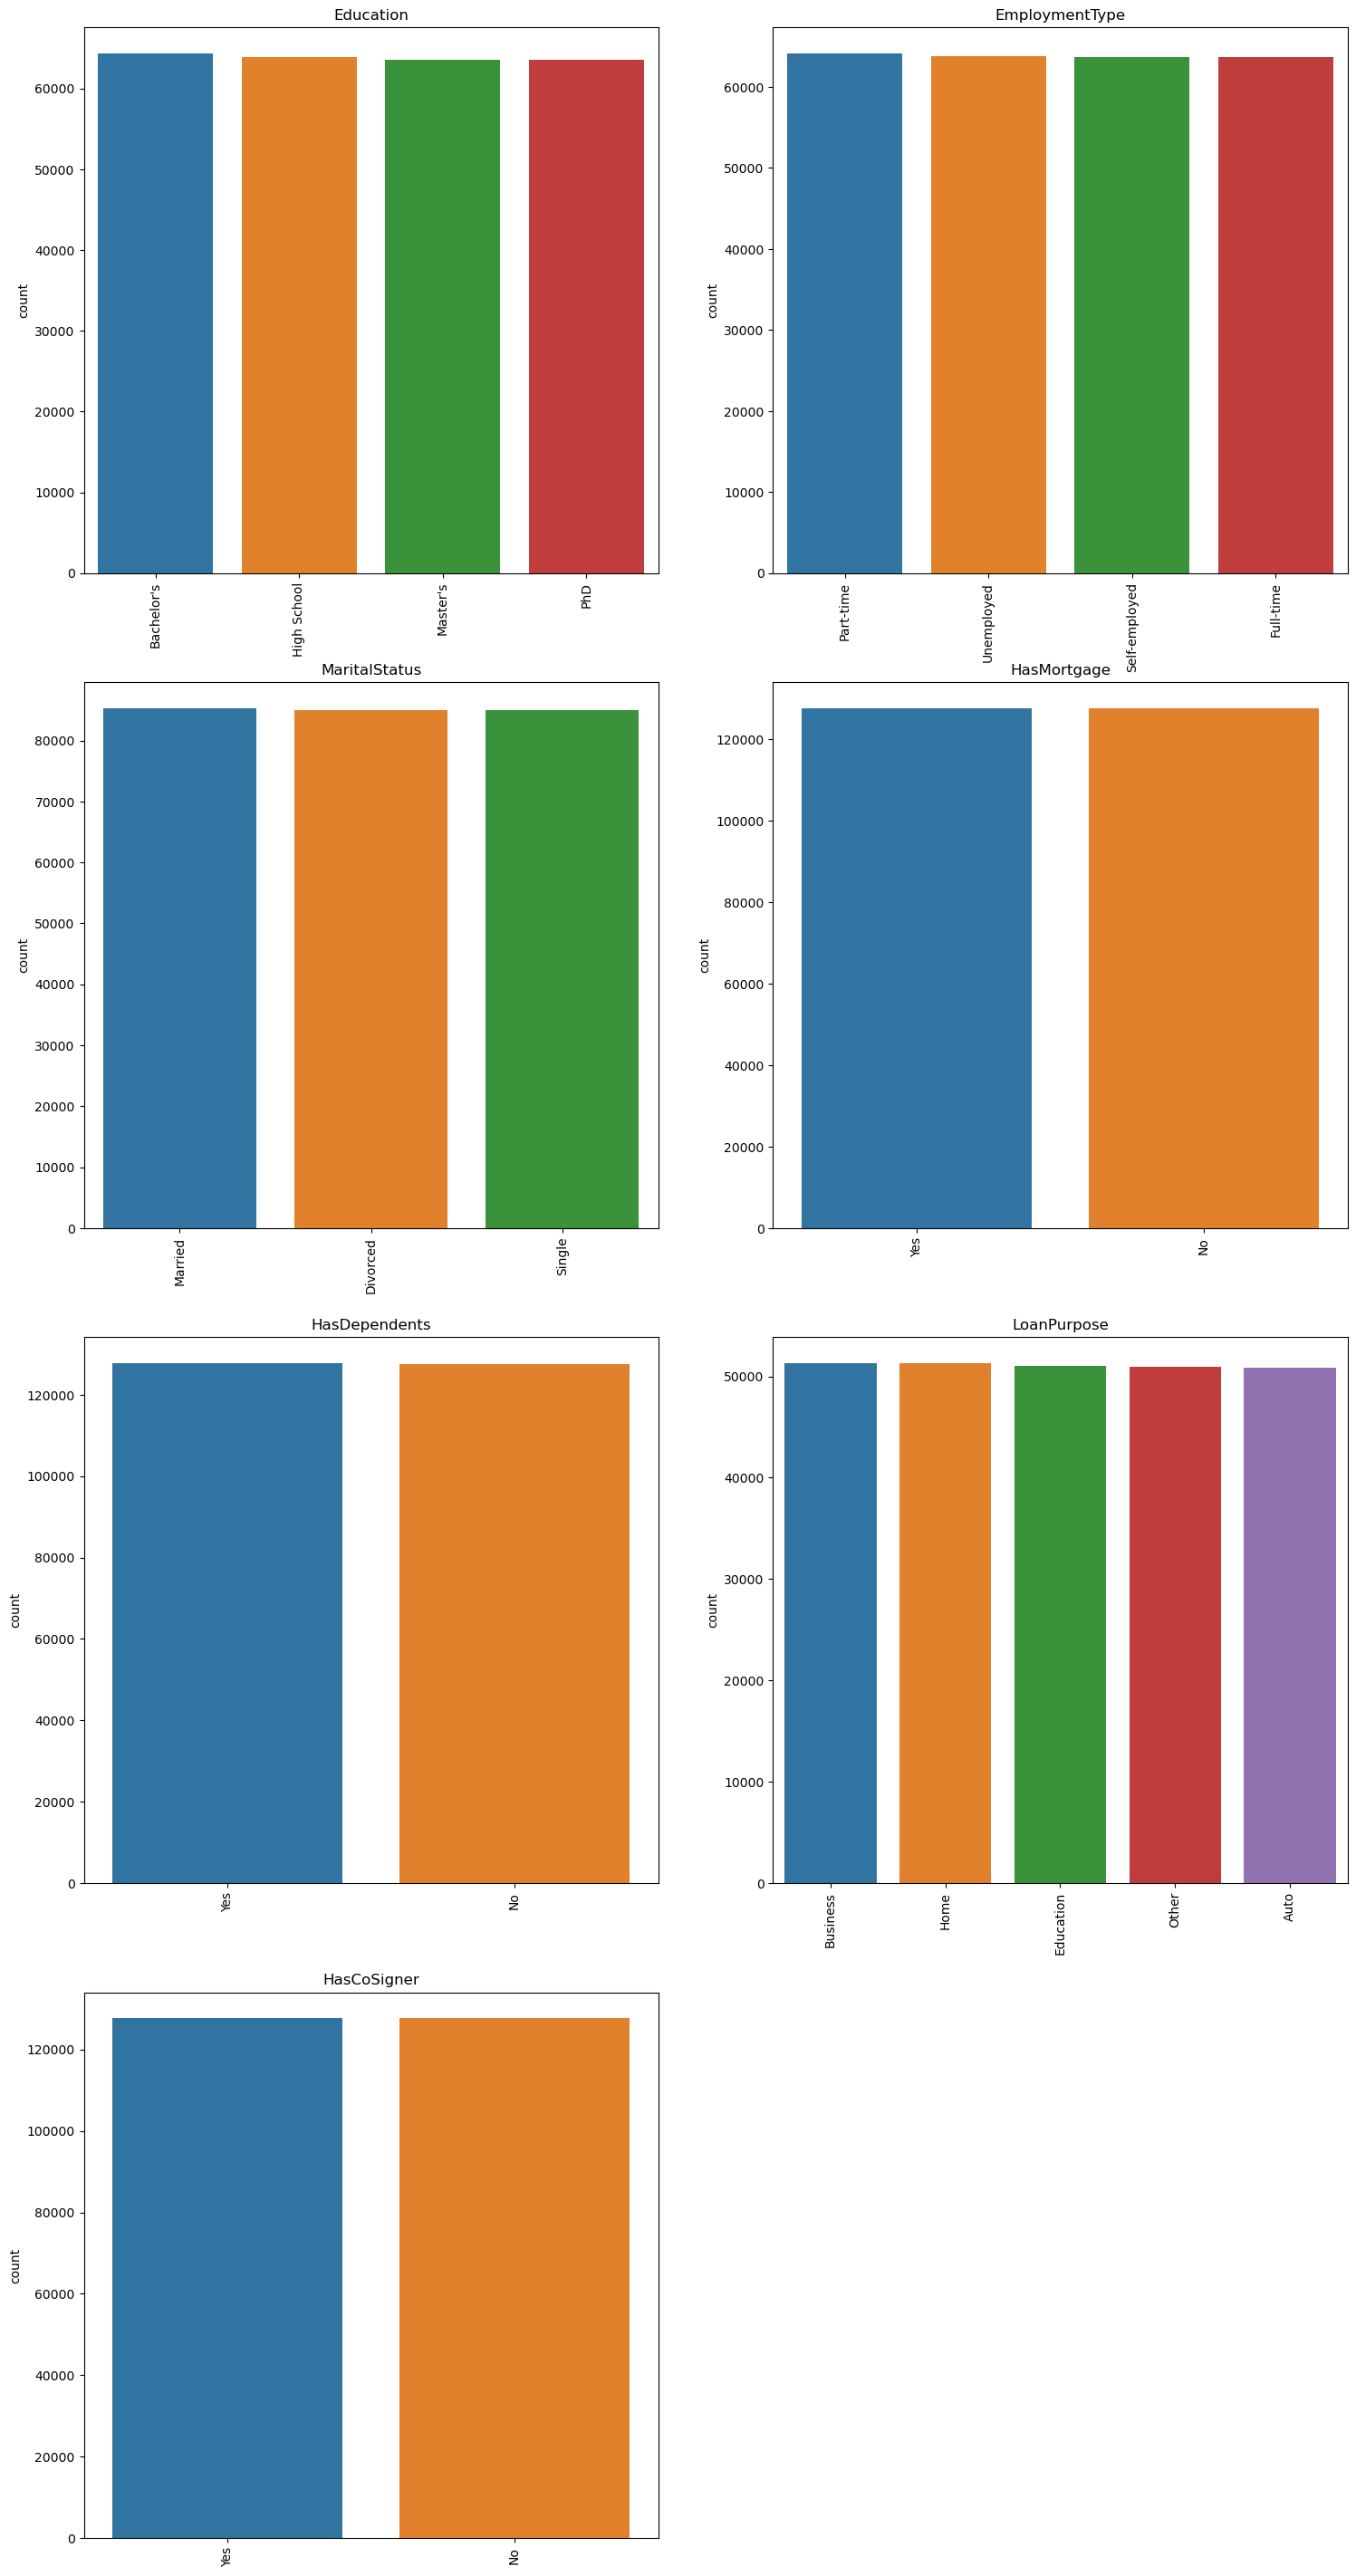

In [147]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(4,2,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  plt.title(col)
  index +=1

C:\Users\User\AppData\Local\Temp\ipykernel_21808\1636442616.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


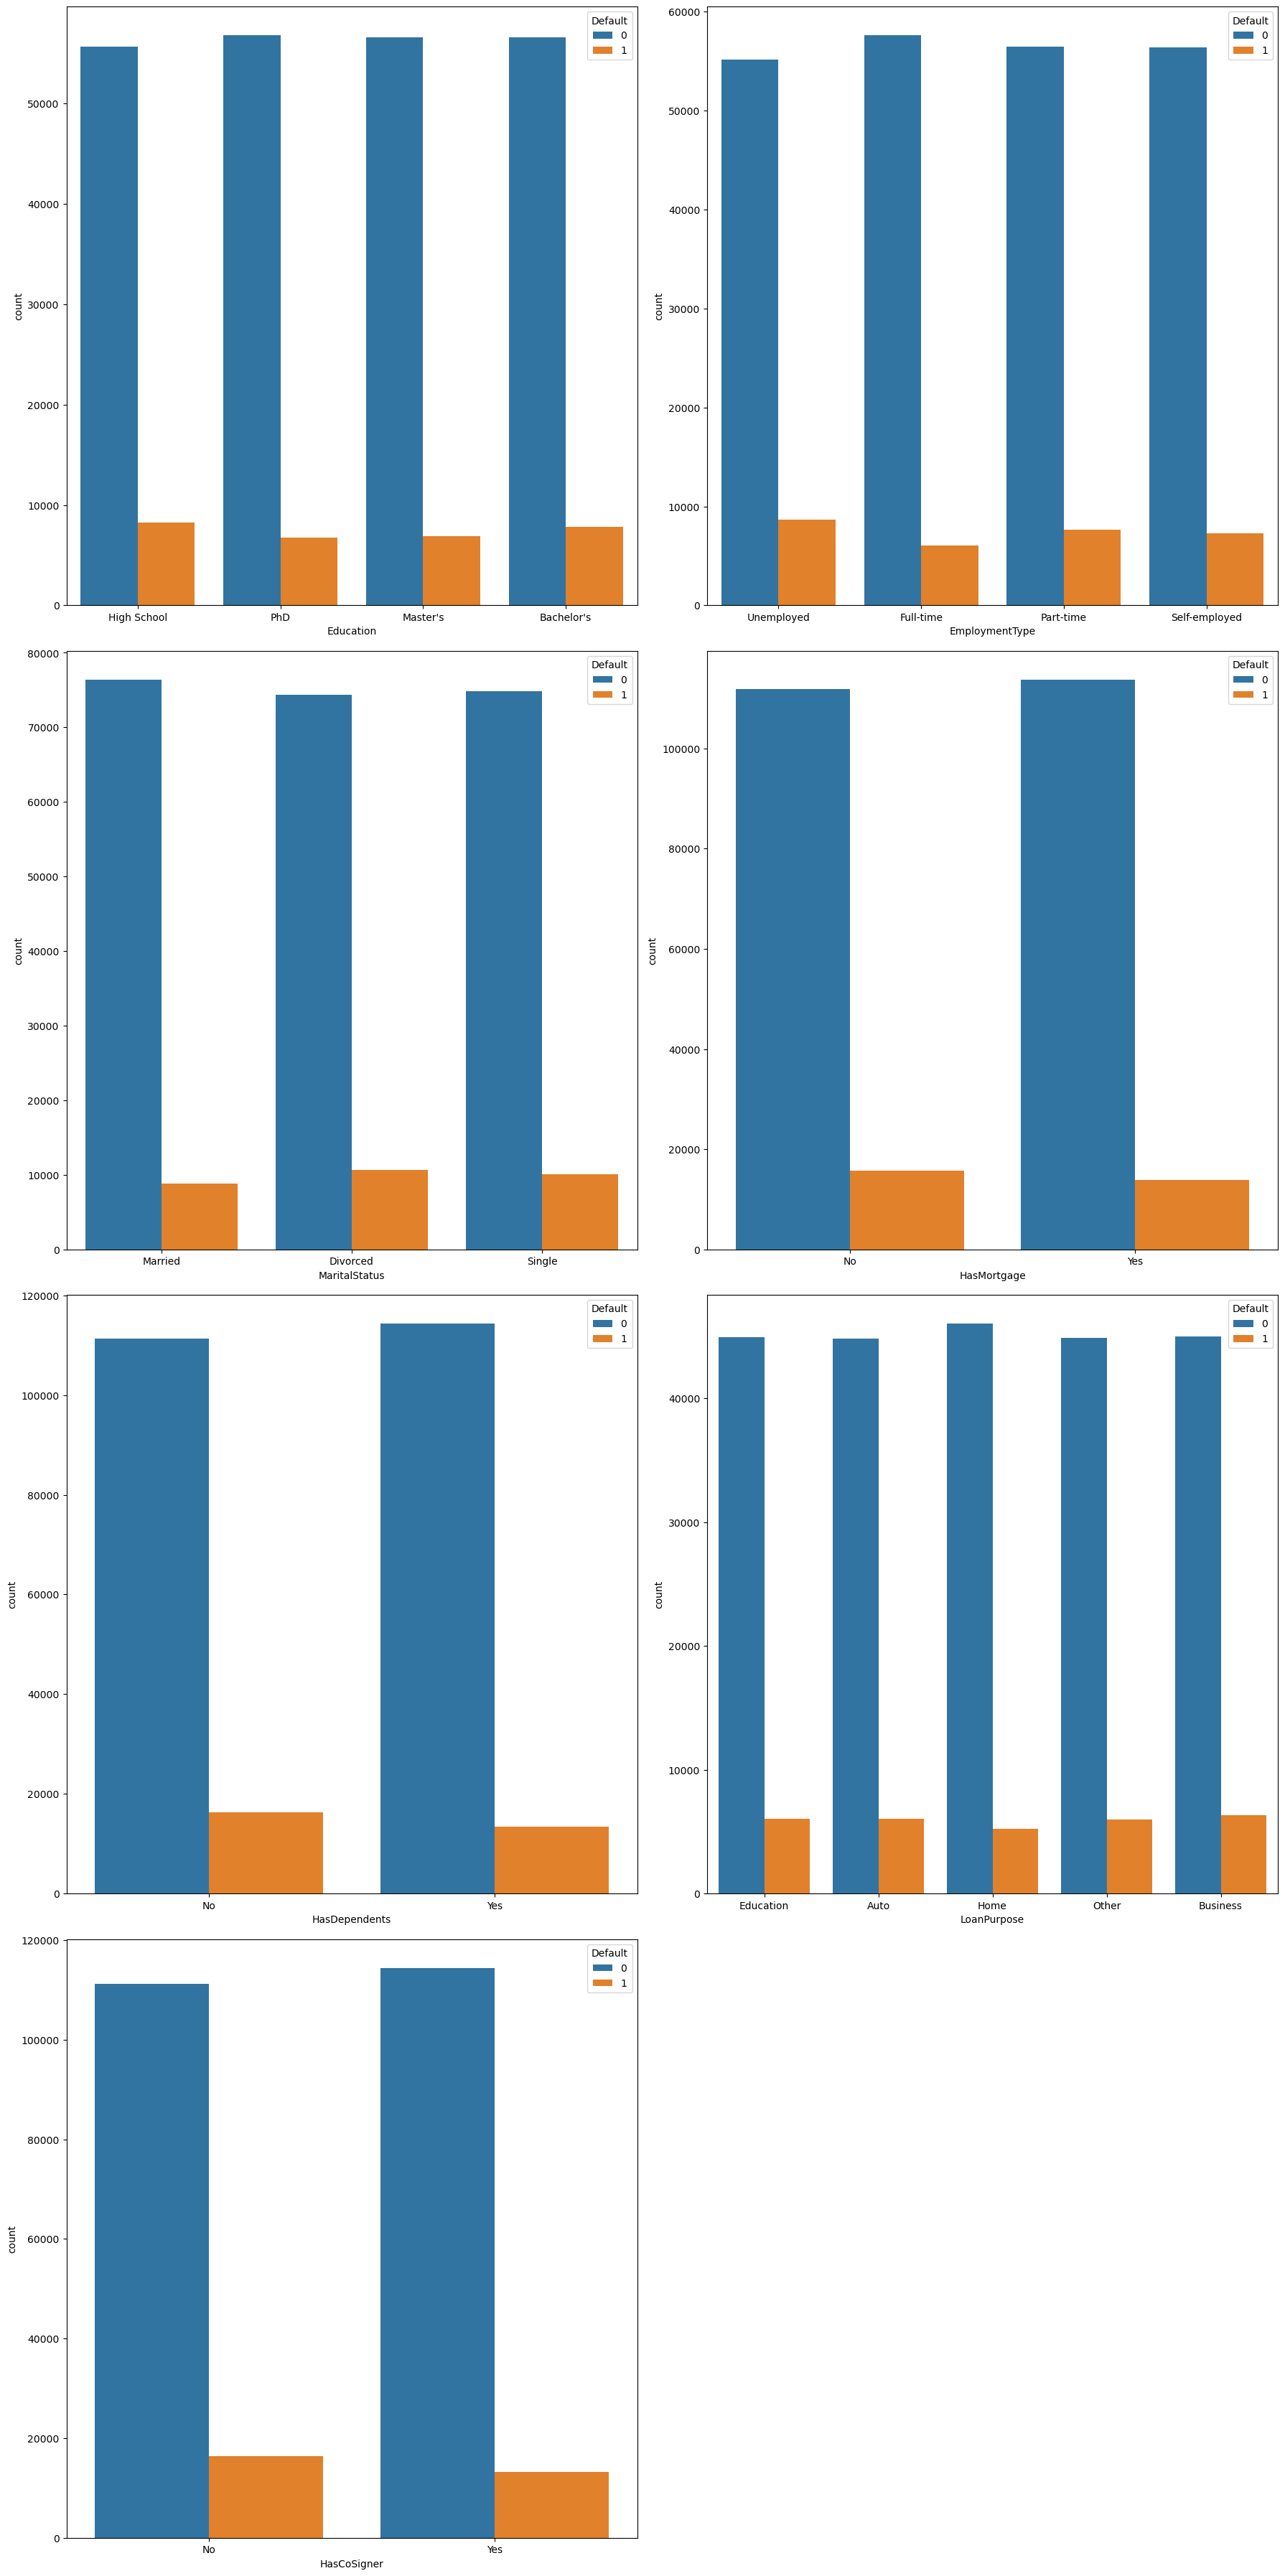

In [148]:
plt.subplots(figsize=(18,36)) 
for i, col in enumerate(['Education', 'EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']): 
    plt.subplot(4, 2, i+1) 
    sns.countplot(data=data, x=col, hue='Default') 
plt.tight_layout() 
plt.show() 

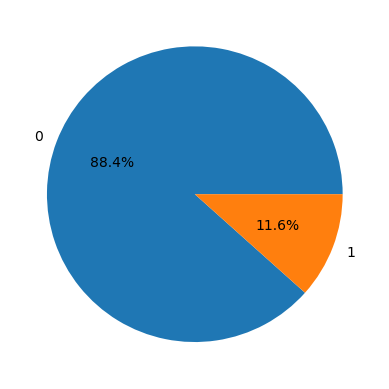

In [149]:
# Examine Default

temp = data['Default'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

Observe that we have imbalance dataset with "0" as dominant factor.

In [150]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [151]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


C:\Users\User\AppData\Local\Temp\ipykernel_21808\2098312839.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


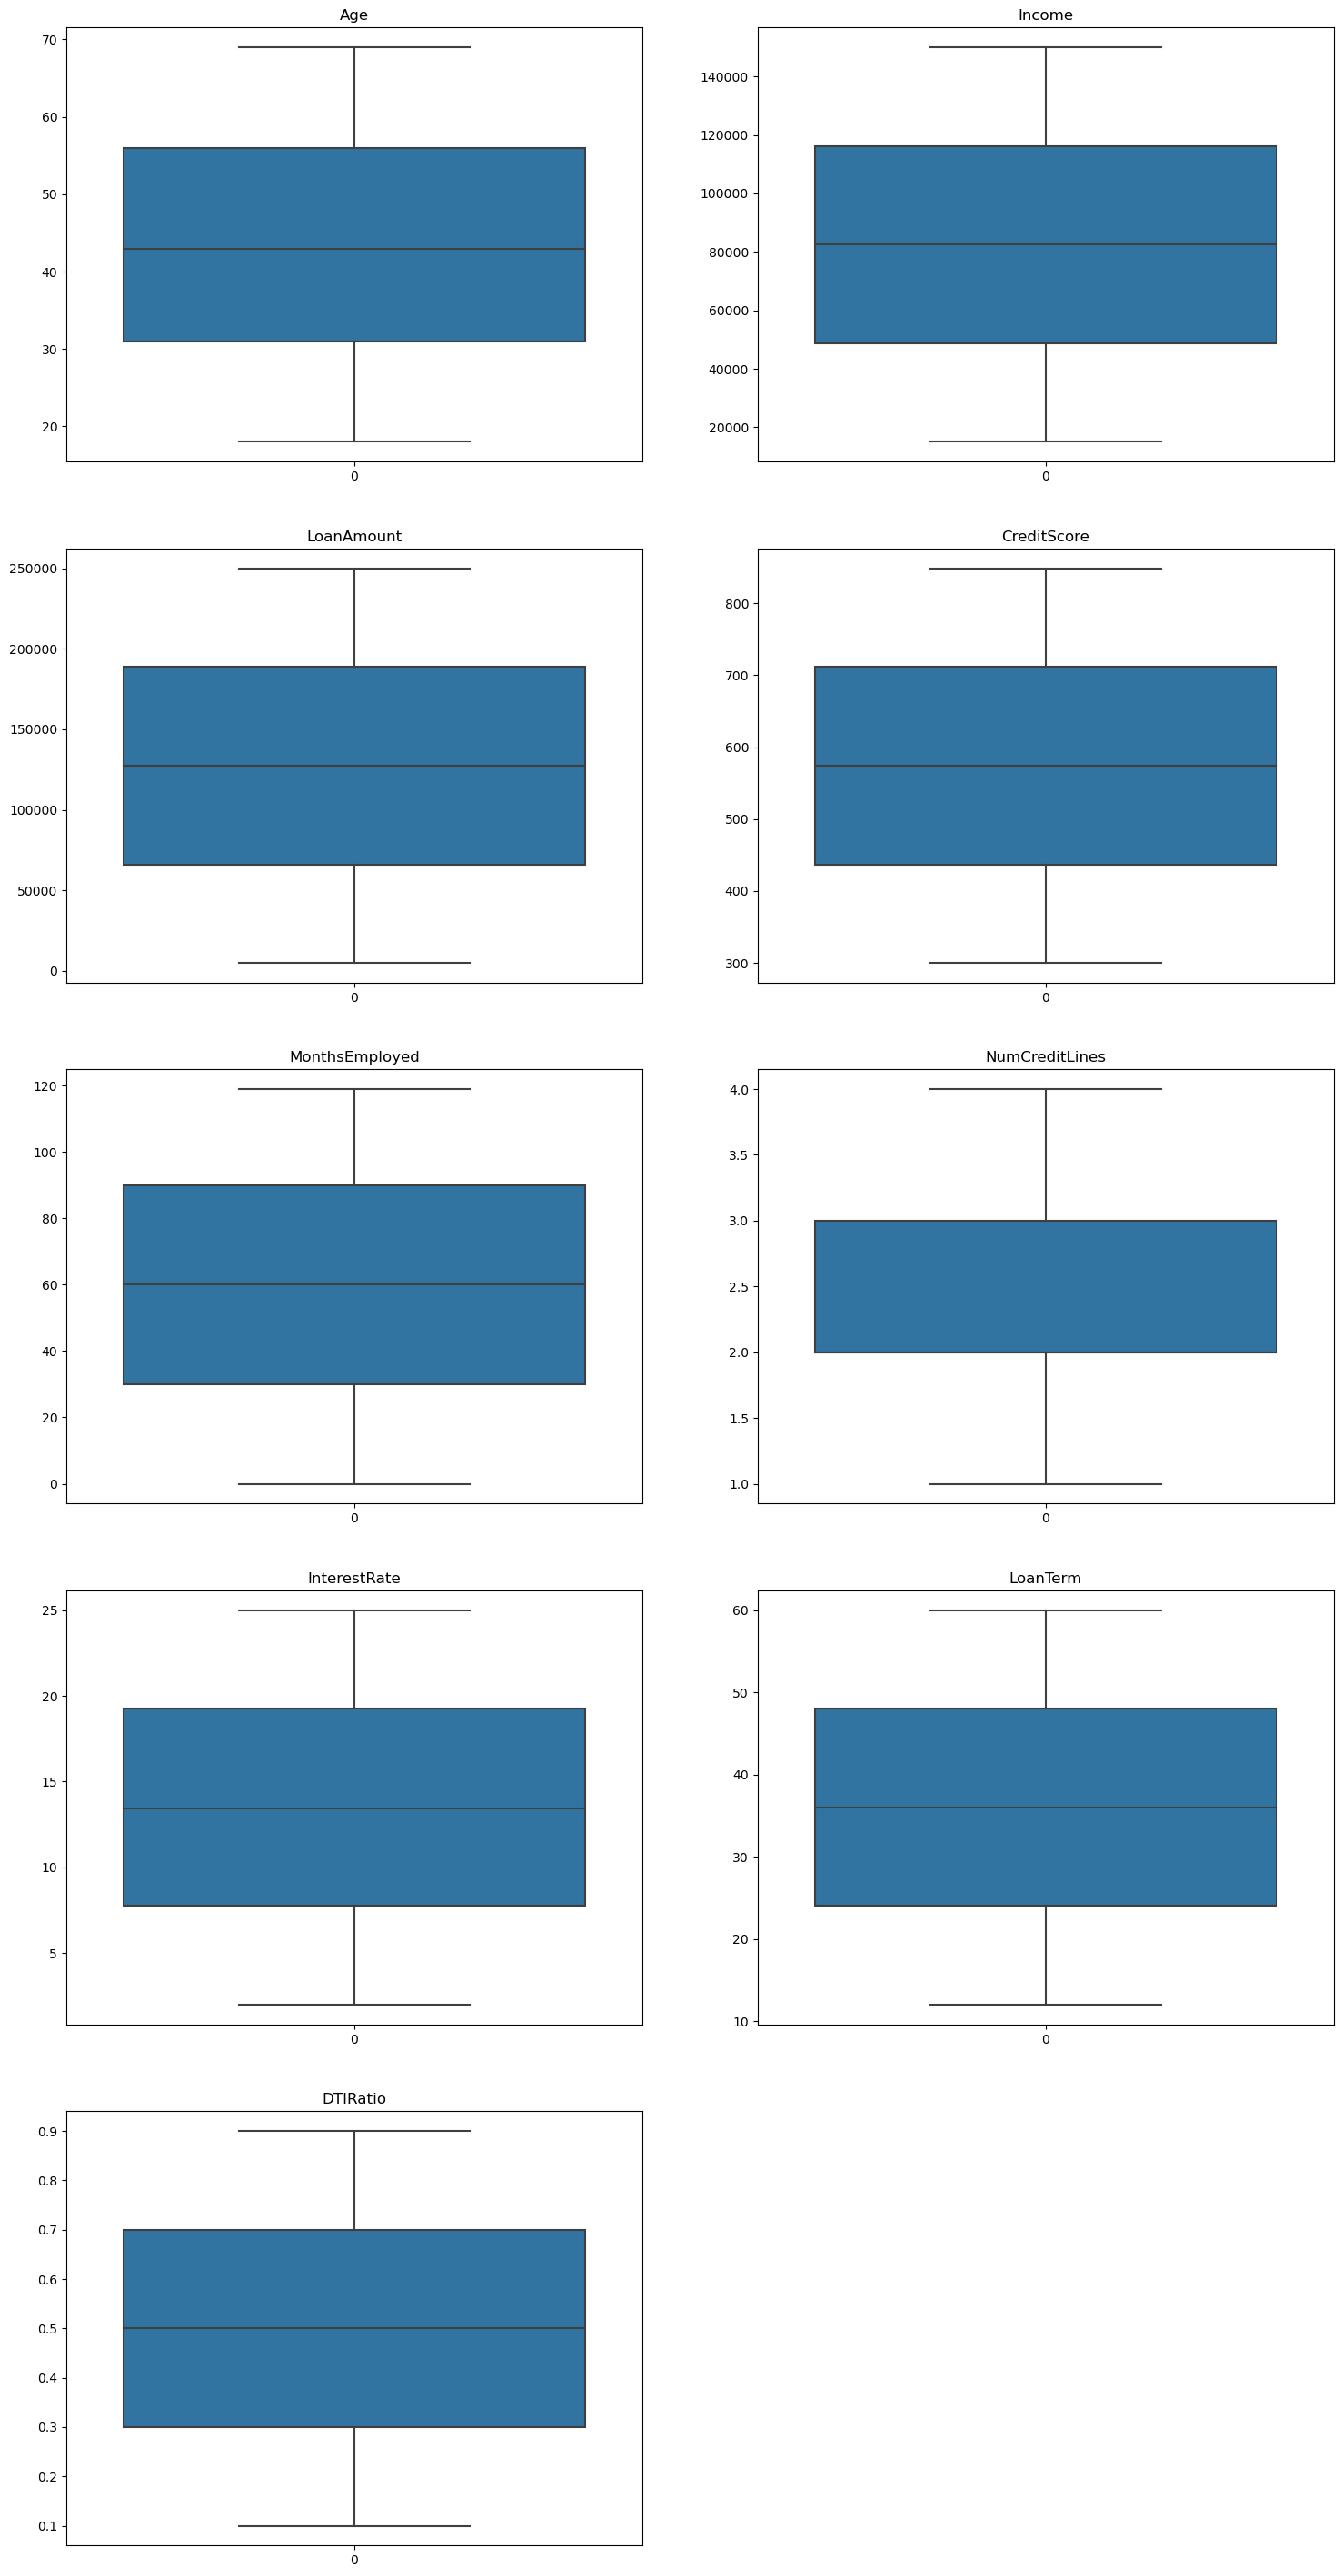

In [152]:
plt.subplots(figsize=(18, 36)) 
for i, col in enumerate(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']): 
    plt.subplot(5, 2, i+1) 
    sns.boxplot(data[col]) .set_title(col)
plt.show() 

We observe that there are no outliers in all of the numerical variables

<Axes: >

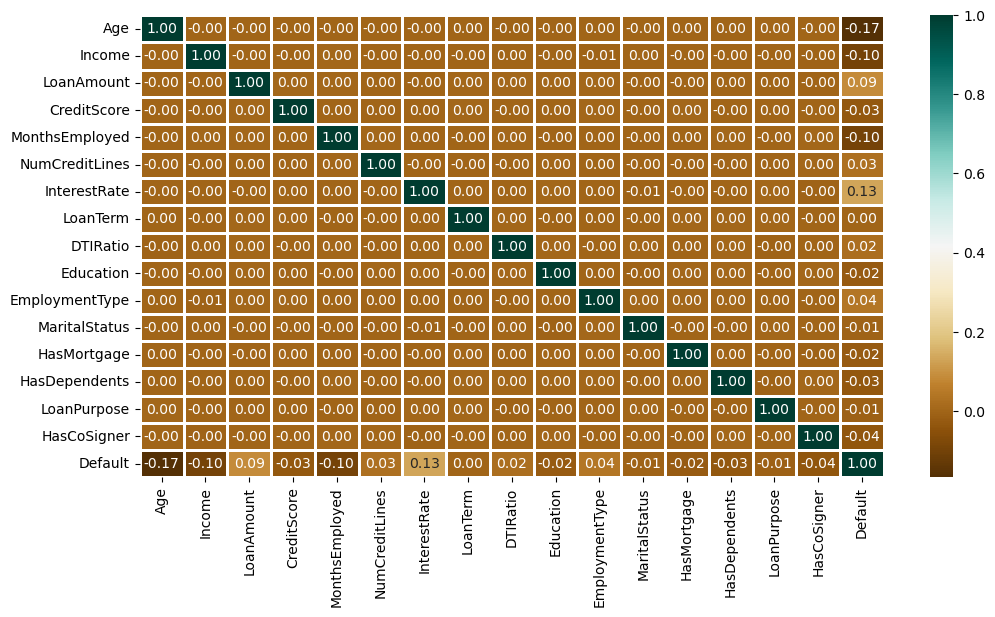

In [153]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

Data Preprocessing

In [154]:
# Check If there's any missing value
data.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [155]:
# Check if there's any duplicated data
data.duplicated().any()

False

Data Splitting

In [156]:
X = data.drop(['Default'],axis=1) 
Y = data['Default'] 
X.shape,Y.shape 

((255327, 16), (255327,))

In [157]:
# Address Data Imbalanced with 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
 
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 180629, 1: 23632})
Class distribution after SMOTE: Counter({0: 180629, 1: 180629})


In [158]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display class distribution before SMOTE for testing data
print("Class distribution before SMOTE (testing data):", Counter(y_test))

# Apply SMOTE to oversample the minority class for testing data
smote_test = SMOTE(sampling_strategy='auto', random_state=42)
X_test_resampled, y_test_resampled = smote_test.fit_resample(X_test, y_test)

# Display class distribution after SMOTE for testing data
print("Class distribution after SMOTE (testing data):", Counter(y_test_resampled))

Class distribution before SMOTE (testing data): Counter({0: 45050, 1: 6016})
Class distribution after SMOTE (testing data): Counter({0: 45050, 1: 45050})


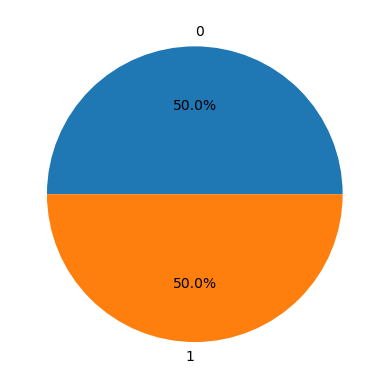

In [159]:
# Visualize countplot with adjusted figure size

temp = y_train_resampled.value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

In [160]:
X_train = X_train_resampled
y_train = y_train_resampled
X_test = X_test_resampled
y_test = y_test_resampled

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361258, 16), (90100, 16), (361258,), (90100,))

In [161]:
# create sample for testing purpose
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_resampled, y_train_resampled, train_size=0.01, random_state=42)

# Check the shape of the sample data and the original sets
print("Shape of X_train_sample:", X_train_sample.shape)
print("Shape of y_train_sample:", y_train_sample.shape)

Shape of X_train_sample: (3612, 16)
Shape of y_train_sample: (3612,)


Modelling

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Initialize classifiers
classifiers = {
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=7),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "MLPClassifier": MLPClassifier(random_state=42)
}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_train_sample)
    accuracy = accuracy_score(y_train_sample, y_pred)
    f1 = f1_score(y_train_sample, y_pred)
    cm = confusion_matrix(y_train_sample, y_pred)
    print(name, ":")
    print("Accuracy:", 100 * accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print()

K-Neighbors Classifier :
Accuracy: 68.49390919158361
F1 Score: 0.6652941176470588
Confusion Matrix:
[[1343  519]
 [ 619 1131]]

Random Forest Classifier :
Accuracy: 98.47729789590255
F1 Score: 0.9842722333428653
Confusion Matrix:
[[1836   26]
 [  29 1721]]

Logistic Regression :
Accuracy: 66.33444075304541
F1 Score: 0.647536231884058
Confusion Matrix:
[[1279  583]
 [ 633 1117]]

Decision Tree Classifier :
Accuracy: 100.0
F1 Score: 1.0
Confusion Matrix:
[[1862    0]
 [   0 1750]]



c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost Classifier :
Accuracy: 100.0
F1 Score: 1.0
Confusion Matrix:
[[1862    0]
 [   0 1750]]

Gaussian Naive Bayes :
Accuracy: 73.9202657807309
F1 Score: 0.7502651113467657
Confusion Matrix:
[[1255  607]
 [ 335 1415]]

MLPClassifier :
Accuracy: 53.0454042081949
F1 Score: 0.6599839615076183
Confusion Matrix:
[[ 270 1592]
 [ 104 1646]]



In [163]:
# making predictions on the testing set 
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(name, ":")
    print("Accuracy:", 100 * accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print()

K-Neighbors Classifier :
Accuracy: 55.1087680355161
F1 Score: 0.5328636599872957
Confusion Matrix:
[[26584 18466]
 [21981 23069]]

Random Forest Classifier :
Accuracy: 78.95338512763595
F1 Score: 0.7854451647941346
Confusion Matrix:
[[36427  8623]
 [10340 34710]]



c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression :
Accuracy: 67.27746947835738
F1 Score: 0.6609005693254356
Confusion Matrix:
[[31886 13164]
 [16319 28731]]

Decision Tree Classifier :
Accuracy: 71.47280799112097
F1 Score: 0.7153819748192277
Confusion Matrix:
[[32095 12955]
 [12748 32302]]

XGBoost Classifier :
Accuracy: 85.84794672586015
F1 Score: 0.85363025885324
Confusion Matrix:
[[40167  4883]
 [ 7868 37182]]

Gaussian Naive Bayes :
Accuracy: 73.97114317425083
F1 Score: 0.7561604524943334
Confusion Matrix:
[[30285 14765]
 [ 8687 36363]]

MLPClassifier :
Accuracy: 53.66814650388457
F1 Score: 0.6676115326735196
Confusion Matrix:
[[ 6432 38618]
 [ 3127 41923]]



Plot ROC Curve

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


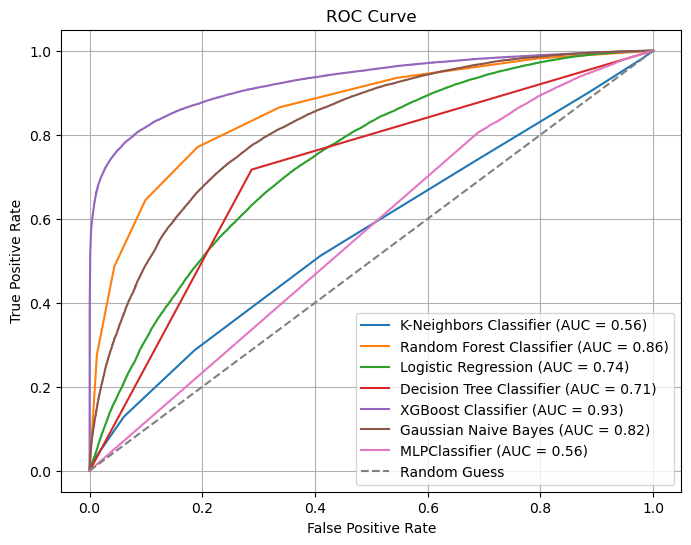

In [164]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for each classifier
plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

K-Nearest Neighbors (KNN)

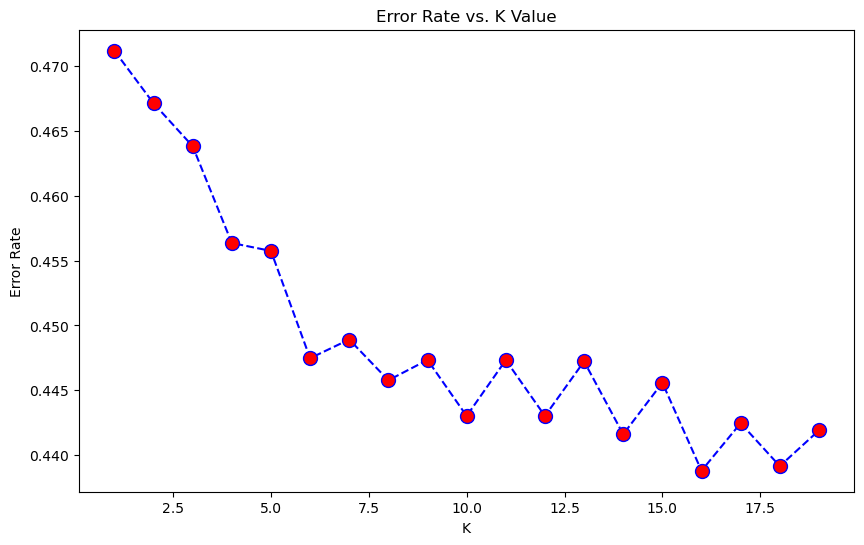

In [165]:
# KNN find the best K using elbow method

error_rate = []
 
# Will take some time
for i in range(1, 20):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sample, y_train_sample)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We observe that elbow locate at k=7.
Hence, we choose k=7 as n_neighbors

After training with sample dataset, now we need to train models with training dataset

In [166]:
trained_classifiers = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(name, ":")
    print("Accuracy:", 100 * accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print()
    trained_classifiers[name] = clf

K-Neighbors Classifier :
Accuracy: 53.00554938956715
F1 Score: 0.4693984962406015
Confusion Matrix:
[[29029 16021]
 [26321 18729]]

Random Forest Classifier :
Accuracy: 82.72031076581577
F1 Score: 0.818553697336985
Confusion Matrix:
[[39413  5637]
 [ 9932 35118]]



c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression :
Accuracy: 67.65482796892341
F1 Score: 0.6779601082932759
Confusion Matrix:
[[30281 14769]
 [14374 30676]]

Decision Tree Classifier :
Accuracy: 78.55382907880133
F1 Score: 0.7805227110096432
Confusion Matrix:
[[36418  8632]
 [10691 34359]]

XGBoost Classifier :
Accuracy: 91.26748057713652
F1 Score: 0.9080518873436952
Confusion Matrix:
[[43381  1669]
 [ 6199 38851]]

Gaussian Naive Bayes :
Accuracy: 73.6992230854606
F1 Score: 0.7565918545529249
Confusion Matrix:
[[29574 15476]
 [ 8221 36829]]

MLPClassifier :
Accuracy: 77.79578246392896
F1 Score: 0.7795967830781095
Confusion Matrix:
[[34712 10338]
 [ 9668 35382]]



c:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


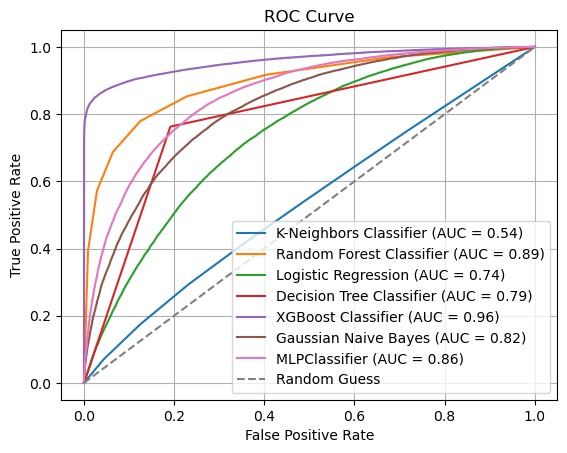

In [173]:
for name, clf in classifiers.items():
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Deployment

In [167]:
#read the data we need to test on in NewApplicants.csv

df_new = pd.read_csv("NewApplicants.csv")
df_new.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,A01,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,NaN
1,A02,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,NaN
2,A03,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,NaN
3,A04,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,NaN
4,A05,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,NaN


In [168]:
# Dropping LoanID column 
df_new.drop(['LoanID'],axis=1,inplace=True)

# Dropping Default column 
df_new.drop(['Default'],axis=1,inplace=True)

In [169]:
label_encoder = preprocessing.LabelEncoder() 
obj = (df_new.dtypes == 'object') 
for col in list(obj[obj].index): 
  df_new[col] = label_encoder.fit_transform(df_new[col])

In [170]:
predictions = {}

# Iterate through each trained classifier
for name, clf in trained_classifiers.items():
    # Make predictions on the new data using the trained classifier
    y_pred = clf.predict(df_new)
    
    # Store the predictions in the dictionary
    predictions[name] = y_pred


In [172]:
# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(predictions)

# Print the DataFrame
print(predictions_df)

# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\User\Documents\predictions.xlsx'

# Export the DataFrame to an Excel file
predictions_df.to_excel(excel_file_path, index=False)

# Print a message to confirm that the export was successful
print(f"DataFrame successfully exported to {excel_file_path}")

    K-Neighbors Classifier  Random Forest Classifier  Logistic Regression  \
0                        0                         0                    0   
1                        1                         0                    0   
2                        0                         0                    1   
3                        0                         0                    0   
4                        0                         0                    0   
5                        0                         0                    1   
6                        0                         0                    0   
7                        0                         0                    0   
8                        0                         0                    1   
9                        1                         0                    0   
10                       0                         0                    0   
11                       1                         0                    0   